1. Возьмите датасет Mortality and Water Hardness
www.kaggle.com...r-hardness

Дополнительно будет выложен в ЛК  
В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция  питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [3]:
water_data = pd.read_csv('/Users/sergejvasiljev/Documents/DATASETS/water.csv')

In [4]:
water_data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


**Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?**

- Построить точечный график  
- Рассчитать коэффициенты корреляции Пирсона и Спирмена  
- Построить модель линейной регрессии  
- Рассчитать коэффициент детерминации  
- Вывести график остатков

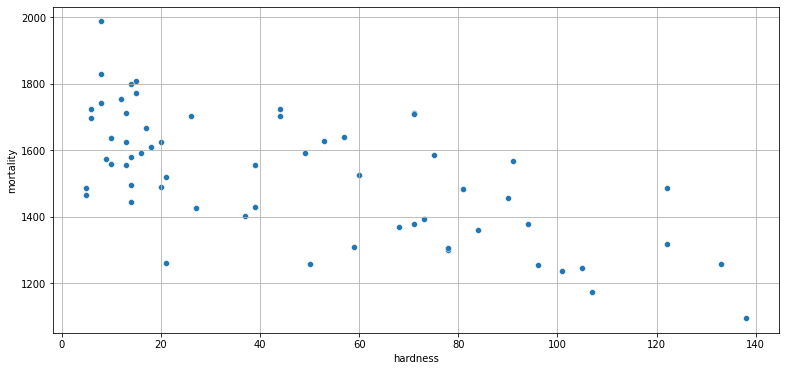

In [5]:
sns.scatterplot(data=water_data[['mortality', 'hardness']], x='hardness', y='mortality').grid()

In [6]:
# считаем коэф. корреляции Пирсона
water_data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [7]:
# считаем коэф. корреляции Спирмана
water_data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [8]:
X = water_data[['hardness']]
y = water_data['mortality']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
model.coef_

array([-3.98317128])

In [12]:
model.intercept_

1713.357485576429

Получаем уравнение прямой:

Y = -3.98\*x - 1713.36

In [13]:
y_pred = model.predict(X_test)

In [14]:
result_df = X_test.copy()
result_df['test'] = y_test
result_df['predict'] = y_pred
result_df['dif'] = result_df['test'] - result_df['predict']
result_df

,hardness,test,predict,dif
4,18,1609,1641.660403,-32.660403
24,91,1569,1350.888899,218.111101
17,39,1428,1558.013806,-130.013806
58,122,1486,1227.410590,258.589410
39,90,1456,1354.872071,101.127929
12,21,1519,1629.710889,-110.710889
54,13,1625,1661.576259,-36.576259
5,10,1558,1673.525773,-115.525773
53,71,1709,1430.552325,278.447675
47,68,1369,1442.501839,-73.501839


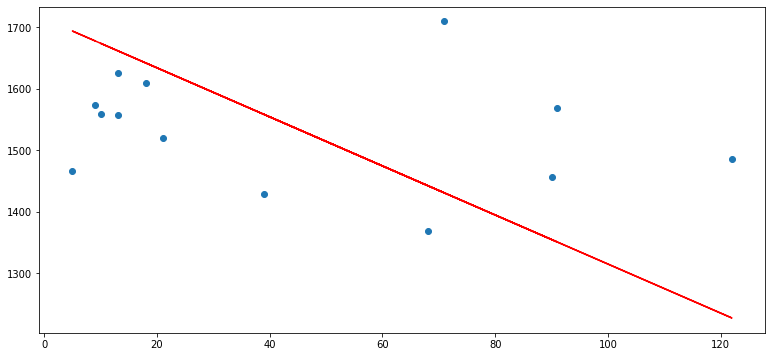

In [15]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

Данных мало для нормального обучения, по этому такие сильные расхождения

In [16]:
model.score(X_test, y_test)

-2.254495161889755

Не понимаю как коэф детерминации получился таким. 

### График остатков

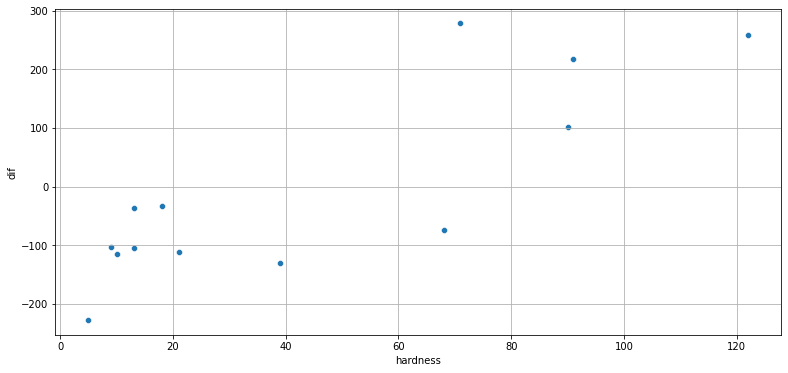

In [17]:
sns.scatterplot(data = result_df[['hardness', 'dif']], x = 'hardness', y = 'dif').grid()

### 3 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [18]:
north = water_data[water_data['location']=='North']
south = water_data[water_data['location']=='South']

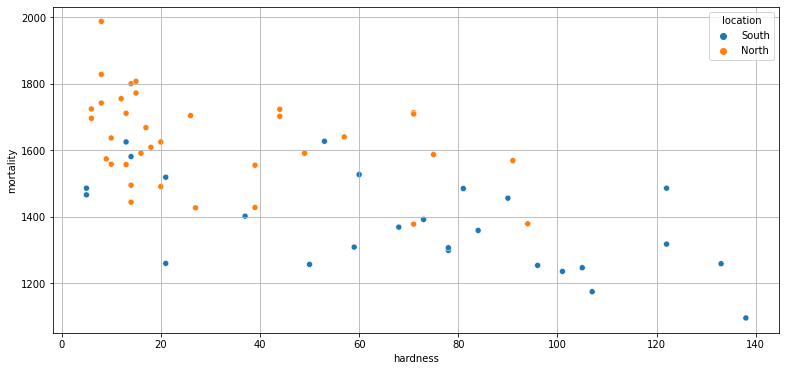

In [19]:
sns.scatterplot(data=water_data, x='hardness', y='mortality', hue='location').grid()

In [20]:
# считаем коэф. корреляции Пирсона
display(north[['mortality', 'hardness']].corr())
display(south[['mortality', 'hardness']].corr())

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [21]:
display(north[['mortality', 'hardness']].corr(method='spearman'))
display(south[['mortality', 'hardness']].corr(method='spearman'))

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


По данным результатм видно, что кореляция у южных городов выше, чем у северных, но каких то выводов делать нельзя, так как данных мало и не все факторы учитываются.  

In [22]:
X_north = north[['hardness']]
y_north = north['mortality']

X_south = south[['hardness']]
y_south = south['mortality']

In [23]:
X_north_train, X_north_test, y_north_train, y_north_test = \
train_test_split(X_north, y_north, test_size=0.20, random_state=15)

X_south_train, X_south_test, y_south_train, y_south_test = \
train_test_split(X_south, y_south, test_size=0.20, random_state=15)

### Север

In [24]:
model = LinearRegression()
model.fit(X_north_train, y_north_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print('coef: ', model.coef_)
print('intercept: ', model.intercept_)

coef:  [-1.85263174]
intercept:  1686.6819598215338


In [26]:
y_north_pred = model.predict(X_north_test)

In [27]:
result_north_df = X_north_test.copy()
result_north_df['test'] = y_north_test
result_north_df['predict'] = y_north_pred
result_north_df['dif'] = result_north_df['test'] - result_north_df['predict']
result_north_df

,hardness,test,predict,dif
45,8,1987,1671.860906,315.139094
30,26,1704,1638.513534,65.486466
44,49,1591,1595.903004,-4.903004
43,14,1444,1660.745115,-216.745115
28,15,1772,1658.892484,113.107516
24,91,1569,1518.092471,50.907529
35,27,1427,1636.660903,-209.660903


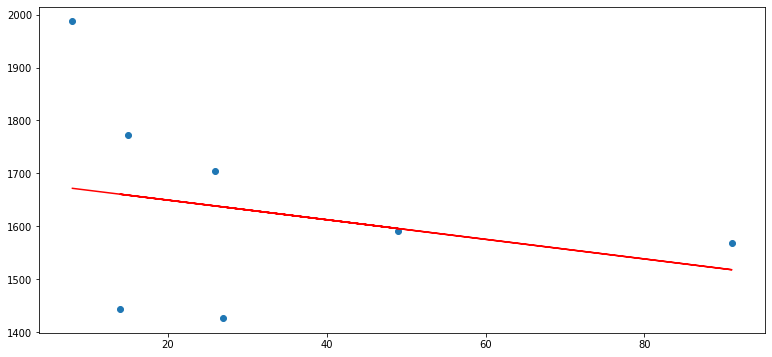

In [28]:
plt.scatter(X_north_test, y_north_test)
plt.plot(X_north_test, y_north_pred, c='r')

In [29]:
model.score(X_north_test, y_north_test)

0.09943811465742047

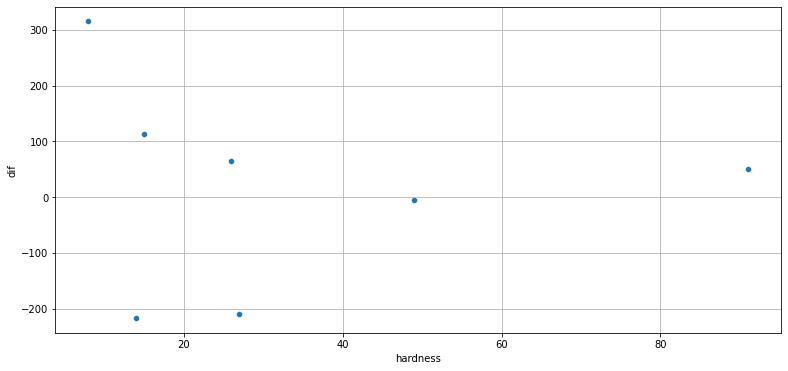

In [36]:
sns.scatterplot(data = result_north_df[['hardness', 'dif']], x = 'hardness', y = 'dif').grid()

Данных слишком мало, по этому такие результаты

### Юг

In [30]:
model = LinearRegression()
model.fit(X_south_train, y_south_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print('coef: ', model.coef_)
print('intercept: ', model.intercept_)

coef:  [-2.11507582]
intercept:  1516.4612393126652


In [32]:
y_south_pred = model.predict(X_south_test)

In [33]:
result_south_df = X_south_test.copy()
result_south_df['test'] = y_south_test
result_south_df['predict'] = y_south_pred
result_south_df['dif'] = result_south_df['test'] - result_south_df['predict']
result_south_df

,hardness,test,predict,dif
38,5,1486,1505.885860,-19.885860
57,53,1627,1404.362221,222.637779
7,78,1299,1351.485326,-52.485326
2,5,1466,1505.885860,-39.885860
13,78,1307,1351.485326,-44.485326
59,81,1485,1345.140098,139.859902


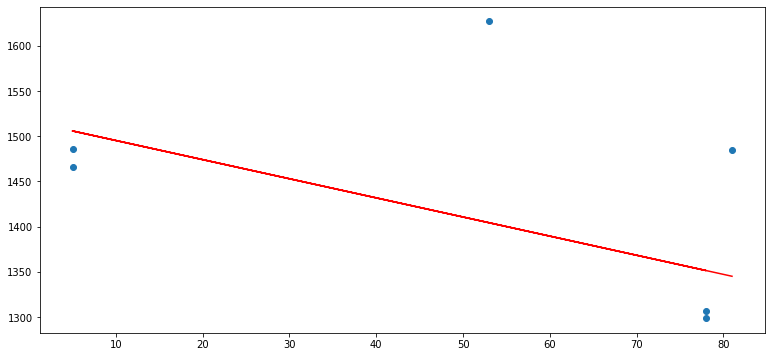

In [34]:
plt.scatter(X_south_test, y_south_test)
plt.plot(X_south_test, y_south_pred, c='r')

In [35]:
model.score(X_south_test, y_south_test)

0.017584700073346338

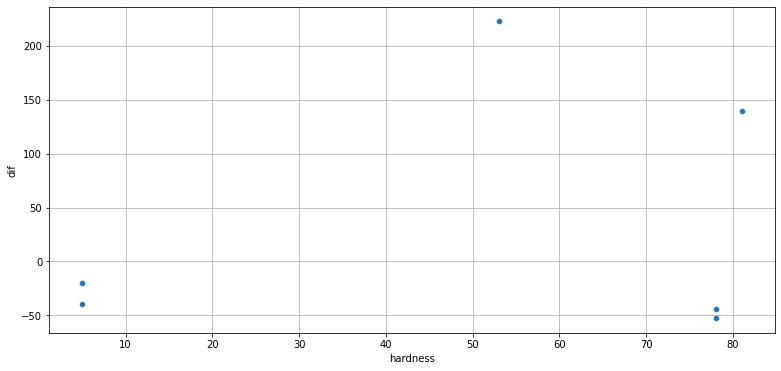

In [37]:
sns.scatterplot(data = result_south_df[['hardness', 'dif']], x = 'hardness', y = 'dif').grid()

Данных слишком мало, по этому такие результаты